[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/gsg213/Computer_Vision_DL/blob/master/intro_to_img_proc/HOG_LBP.ipynb)

In [ ]:
import numpy as np

from matplotlib import pyplot as plt
from skimage.feature import hog, local_binary_pattern
from skimage.io import imread
from skimage.transform  import resize
from skimage.color import rgb2gray



# HOG

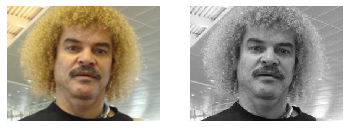

In [ ]:
img = imread('pibe.jpg')
img_gray = rgb2gray(img)

plt.subplot(121)
plt.imshow(img)
plt.axis('off')

plt.subplot(122)
plt.imshow(img_gray, cmap = 'gray', interpolation = 'nearest')
plt.axis('off')

plt.show()

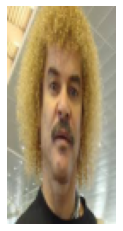

In [ ]:
#resize to ratio 1:2
img_res = resize(img,(128,64))
plt.imshow(img_res)
plt.axis('off')
plt.show()

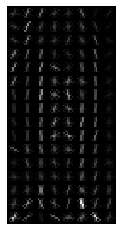

3780


In [ ]:
fd1, hog_1 = hog(img_res, orientations = 9, pixels_per_cell = (8,8), cells_per_block = (2,2), visualize = True )

plt.imshow(hog_1, cmap = 'gray', interpolation = 'nearest')
plt.axis('off')

plt.show()

# features vector
print(len(fd1))

# LBP

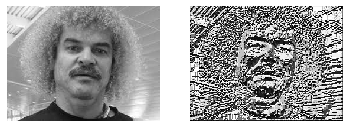

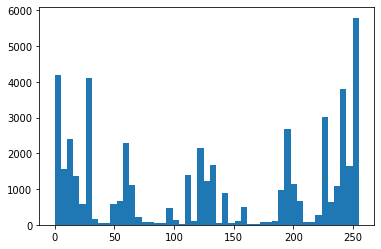

[2066 1038   78  368  577   49  343 1090   89   45]


In [ ]:
img2 = local_binary_pattern(img_gray,8,1,'default')

(hist,_) = np.histogram(img2.ravel(), bins = np.arange(0,  11), range = (0, 255))

#hist = hist.astype('float')
#hist /= (hist.sum() + 1e-7)

plt.subplot(121)
plt.imshow(img_gray, cmap = 'gray', interpolation = 'nearest')
plt.axis('off')

plt.subplot(122)
plt.imshow(img2, cmap = 'gray', interpolation = 'nearest')
plt.axis('off')
plt.show()
plt.hist(img2.ravel(),bins=np.linspace(0,255,50))
plt.show()
print(hist)

Processing: alvarez.jpg
Distance: 0.11331076998688666
Processing: pibe2.jpg
Distance: 0.09349665128400422
Processing: higuita.jpg
Distance: 0.10468154556101156


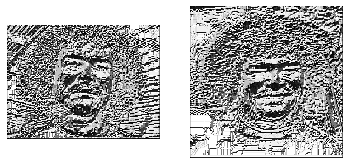

In [ ]:
dir_path = 'img/'

img = imread(dir_path+'pibe.jpg')
img_gray = rgb2gray(img)
img3 = local_binary_pattern(img_gray,8,1,'default')
(hist3,_) = np.histogram(img3.ravel(), bins = np.arange(0,  11), range = (0, 255))
hist3 = hist3.astype('float')
hist3 /= (hist3.sum() + 1e-7)


players = ['alvarez.jpg','pibe2.jpg','higuita.jpg']

dist34 = 0
hist_better = 0
better = 10000

for im in players:
  print('Processing: '+im)
  img_comp = imread(dir_path+im)
  img_cgray = rgb2gray(img_comp)
  img4 = local_binary_pattern(img_cgray,8,1,'default')
  (hist4,_) = np.histogram(img4.ravel(), bins = np.arange(0,  11), range = (0, 255))
  hist4 = hist4.astype('float')
  hist4 /= (hist4.sum() + 1e-7)


  dist34 = np.linalg.norm(hist4 - hist3)
  print('Distance: {}'.format(dist34))
  if dist34 < better:
    better = dist34
    img_better = img4
    hist_better = hist4


plt.subplot(121)
plt.imshow(img3, cmap = 'gray', interpolation = 'nearest')
plt.axis('off')

plt.subplot(122)
plt.imshow(img_better, cmap = 'gray', interpolation = 'nearest')
plt.axis('off')
plt.show()
